### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.


Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

In [66]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

In [3]:
heart_df = pd.read_csv("data/heart_disease.csv")
heart_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0


### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [4]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
categorical_col = ['sex', 'cp','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_col = ['age','trestbps','chol','thalach','oldpeak']

In [9]:
X = heart_df.drop('target',axis=1)
y = heart_df['target']
X.shape, y.shape

((303, 13), (303,))

In [12]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='median')

In [15]:
X[categorical_col] = cat_imputer.fit_transform(X[categorical_col])
X[numerical_col] = num_imputer.fit_transform(X[numerical_col])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0


In [16]:
num_scaler = StandardScaler()
X[numerical_col] = num_scaler.fit_transform(X[numerical_col])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1.0,3.0,0.763956,-0.256334,1.0,0.0,0.015443,0.0,1.087338,0.0,0.0,1.0
1,-1.915313,1.0,2.0,-0.092738,0.072199,0.0,1.0,1.633471,0.0,2.122573,0.0,0.0,2.0
2,-1.474158,0.0,1.0,-0.092738,-0.816773,0.0,0.0,0.977514,0.0,0.310912,2.0,0.0,2.0
3,0.180175,1.0,1.0,-0.663867,-0.198357,0.0,1.0,1.239897,0.0,-0.206705,2.0,0.0,2.0
4,0.290464,0.0,0.0,-0.663867,2.082050,0.0,1.0,0.583939,1.0,-0.379244,2.0,0.0,2.0


### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [18]:
X = heart_df.drop('target',axis=1)
y = heart_df['target']
X.shape, y.shape

((303, 13), (303,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for eachtree. Use the default values for other hyperparameters.

In [22]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='median')

num_scaler = StandardScaler()

In [23]:
X_train[categorical_col] = cat_imputer.fit_transform(X_train[categorical_col])
X_train[numerical_col] = num_imputer.fit_transform(X_train[numerical_col])

X_train[numerical_col] = num_scaler.fit_transform(X_train[numerical_col])

In [25]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=10,
                            random_state=123)

In [26]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=123)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [87]:
def eval_model(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    
    print(f"Accuracy : {accuracy}")
    print(f"Precision : {precision}")
    print(f"Recall : {recall}")
    print(f"F1 Score : {f1}")
    
    return {'accuracy':accuracy,
           'precison':precision,
           'recall':recall,
           'f1':f1}

In [29]:
X_test[categorical_col] = cat_imputer.transform(X_test[categorical_col])
X_test[numerical_col] = num_imputer.transform(X_test[numerical_col])

X_test[numerical_col] = num_scaler.transform(X_test[numerical_col])

In [30]:
y_pred = rf.predict(X_test)

In [88]:
rf_score = eval_model(y_test,y_pred)

Accuracy : 0.7912087912087912
Precision : 0.7547169811320755
Recall : 0.8695652173913043
F1 Score : 0.8080808080808081


### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [37]:
rf.feature_names_in_,rf.feature_importances_

(array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object),
 array([0.10243   , 0.03219119, 0.13064721, 0.07232786, 0.07133389,
        0.01229741, 0.01530566, 0.11926679, 0.05253992, 0.09955828,
        0.04179981, 0.13823785, 0.11206412]))

In [43]:
feature_importance_dict = {}

for i, feature_name in enumerate(rf.feature_names_in_):
    feature_importance_dict[feature_name] = rf.feature_importances_[i]

print(feature_importance_dict)

{'age': 0.1024300012772925, 'sex': 0.032191188412427706, 'cp': 0.13064721185828565, 'trestbps': 0.07232786090586589, 'chol': 0.07133389097002962, 'fbs': 0.012297413948061454, 'restecg': 0.01530565938205579, 'thalach': 0.1192667933802131, 'exang': 0.05253992101591858, 'oldpeak': 0.09955828361822386, 'slope': 0.04179980516844967, 'ca': 0.13823785212520887, 'thal': 0.11206411793796714}


In [44]:
sorted_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)

{'ca': 0.13823785212520887, 'cp': 0.13064721185828565, 'thalach': 0.1192667933802131, 'thal': 0.11206411793796714, 'age': 0.1024300012772925, 'oldpeak': 0.09955828361822386, 'trestbps': 0.07232786090586589, 'chol': 0.07133389097002962, 'exang': 0.05253992101591858, 'slope': 0.04179980516844967, 'sex': 0.032191188412427706, 'restecg': 0.01530565938205579, 'fbs': 0.012297413948061454}


In [39]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
top_features = X_train.columns[indices][:5]
print("Top 5 features:", top_features)

Top 5 features: Index(['ca', 'cp', 'thalach', 'thal', 'age'], dtype='object')


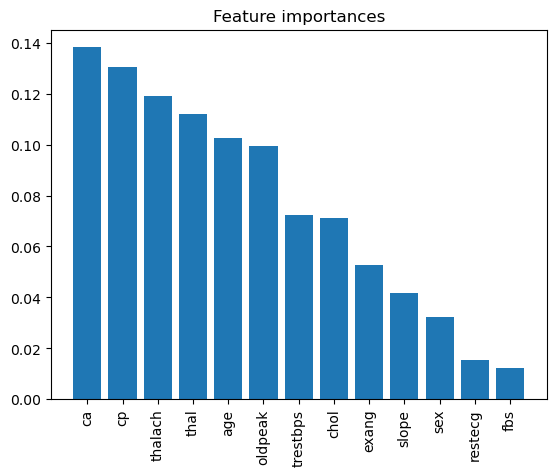

In [42]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [71]:
rf_params = {'n_estimators':[10,50,100,150,200],
            'max_depth':[1,5,10,20],
            'min_samples_split':[1,2,5,7,10],
             'min_samples_leaf':[1,2,5,10]}

In [72]:
rf1=RandomForestClassifier()

In [77]:
cv = RandomizedSearchCV(estimator=rf1,
                        param_distributions=rf_params,
                        cv=5,
                        verbose=3,
                        scoring='accuracy')

In [78]:
cv.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=150;, score=0.814 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=150;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=150;, score=0.905 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=150;, score=0.833 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=150;, score=0.857 total time=   0.1s
[CV 1/5] END max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.814 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.791 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.833 total time=   0.0s
[

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._disp

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   scoring='accuracy', verbose=3)

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [79]:
cv.best_params_

{'n_estimators': 150,
 'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_depth': 20}

In [83]:
rf_cv=RandomForestClassifier(**cv.best_params_)

In [84]:
rf_cv.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=7,
                       n_estimators=150)

In [85]:
y_pred_cv = rf_cv.predict(X_test)
score_cv = eval_model(y_test,y_pred_cv)

Accuracy : 0.8241758241758241
Precision : 0.7884615384615384
Recall : 0.8913043478260869
F1 Score : 0.836734693877551


In [89]:
rf_score

{'accuracy': 0.7912087912087912,
 'precison': 0.7547169811320755,
 'recall': 0.8695652173913043,
 'f1': 0.8080808080808081}

### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

Plotting Decision boundary for the model is challenging. 
And the model doesnt have high accuracy for to be used in real life as heart disease are important issue so we would need to more training data and better model to increase the accuracy and better predictions